In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Files to Load
city_data_to_load = os.path.join('.', 'Resources', 'city_data.csv')
ride_data_to_load = os.path.join('.', 'Resources', 'ride_data.csv')

In [3]:
# Read the City Data and Store in a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban

In [4]:
# Read the Ride Data and Store in a DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   111953927754
8     South Karenland  2019-01-08 03:28:48  35.09  7995623208694
9       North Jasmine  2019-03-09 06:26:29  42.81  5327642267789

In [5]:
# Find null data in city data
city_data_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Determine data types of city data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
city_data_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [8]:
# Find null data in ride data
ride_data_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
# Determine data types of ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
# Combine the two data sets
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on = ['city', 'city'])

# Display dataframe to make sure merge was successful
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [11]:
# Create the Urban Cities DataFrame
urban_cities_df = pyber_data_df.loc[pyber_data_df['type']=='Urban']
urban_cities_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [12]:
# Create the Suburban Cities DataFrame
suburban_cities_df = pyber_data_df.loc[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

city                 date   fare        ride_id  driver_count  \
1625  Barronchester  2019-01-27 03:08:01  27.79  6653622887913            11   
1626  East Kentstad  2019-04-07 19:44:19  18.75  6575961095852            20   
1627      Lake Omar  2019-01-17 21:33:35  21.71   966911700371            22   
1628     Myersshire  2019-02-27 17:38:39  17.10  5706770909868            19   
1629    West Hannah  2019-04-19 01:06:59  37.78  2273047151891            12   

          type  
1625  Suburban  
1626  Suburban  
1627  Suburban  
1628  Suburban  
1629  Suburban

In [13]:
# Create the Rural Cities DataFrame
rural_cities_df = pyber_data_df.loc[pyber_data_df['type']=='Rural']
rural_cities_df.head()

city                 date   fare        ride_id  \
2250   Randallchester  2019-04-13 11:13:31  43.22  1076079536213   
2251      North Holly  2019-02-02 14:54:00  12.42  1985256326182   
2252      Michaelberg  2019-03-27 18:27:34  54.85  4421836952718   
2253  Lake Latoyabury  2019-02-23 21:12:24  47.90  3269652929887   
2254  Lake Latoyabury  2019-05-06 08:57:56  51.80  4018025271936   

      driver_count   type  
2250             9  Rural  
2251             8  Rural  
2252             6  Rural  
2253             2  Rural  
2254             2  Rural

In [14]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [15]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [16]:
# Get the number of rides for suburban cities
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [17]:
# Get the average fare for urban cities
urban_average_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_average_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [18]:
# Get the average fare for suburban cities
suburban_average_fare = suburban_cities_df.groupby(['city']).mean()['fare']

# Get the average fare for rural cities
rural_average_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [19]:
# Get the average number of drivers for each urban city
urban_average_drivers = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_average_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [20]:
# Get the average number of drivers for suburban each city
suburban_average_drivers = suburban_cities_df.groupby(['city']).mean()['driver_count']

# Get the average number of drivers for each rural city
rural_average_drivers = rural_cities_df.groupby(['city']).mean()['driver_count']

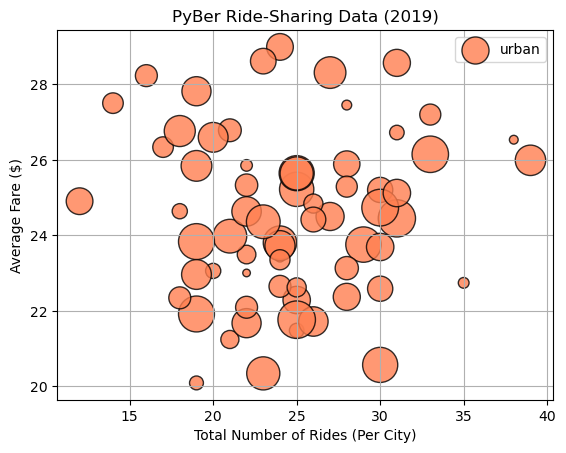

In [21]:
# Build the scatter plot for urban cities
plt.scatter(urban_ride_count, urban_average_fare, s=10*urban_average_drivers, color='coral', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='urban')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()
plt.show()

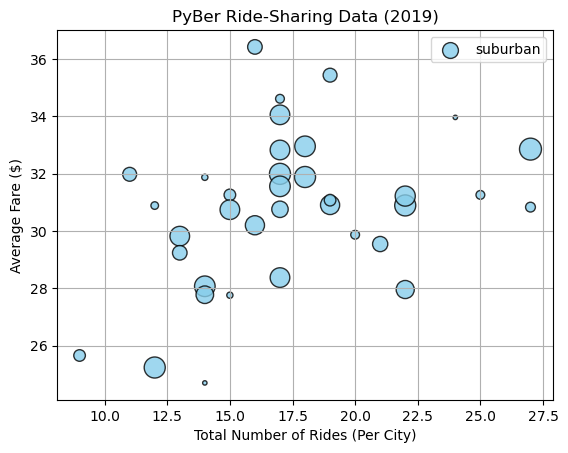

In [22]:
# Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_average_fare, s=10*suburban_average_drivers, color='skyblue', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='suburban')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()
plt.show()

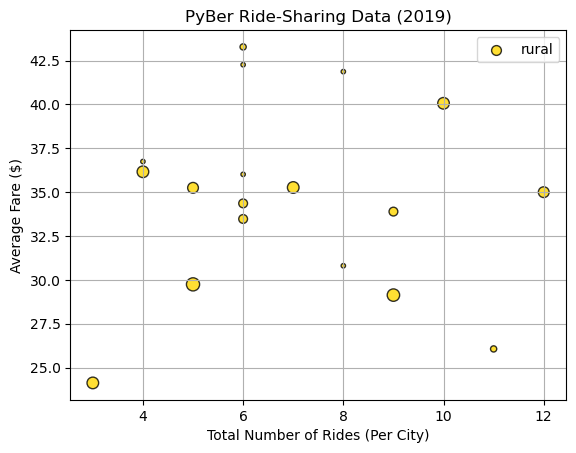

In [23]:
# Build the scatter plot for rural cities
plt.scatter(rural_ride_count, rural_average_fare, s=10*rural_average_drivers, color='gold', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='rural')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()
plt.show()

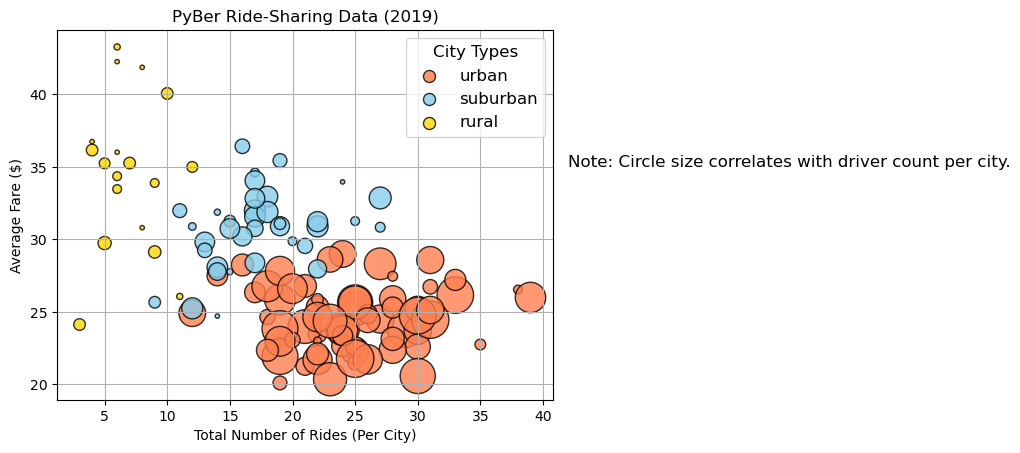

In [24]:
# Combine all three scatter plots
plt.scatter(urban_ride_count, urban_average_fare, s=10*urban_average_drivers, color='coral', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='urban')
plt.scatter(suburban_ride_count, suburban_average_fare, s=10*suburban_average_drivers, color='skyblue', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='suburban')
plt.scatter(rural_ride_count, rural_average_fare, s=10*rural_average_drivers, color='gold', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='rural')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()

In [25]:
urban_cities_df.describe()

fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000

In [26]:
suburban_cities_df.describe()

fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000

In [27]:
rural_cities_df.describe()

fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std     14.558046  2.887834e+12      2.691156
min     10.110000  2.684873e+10      1.000000
25%     19.900000  2.275364e+12      1.000000
50%     37.050000  4.023962e+12      4.000000
75%     47.070000  7.118047e+12      7.000000
max     58.550000  9.990581e+12      9.000000

In [28]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [29]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [30]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [31]:
# Calculate the mean ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [32]:
# Calculate the median ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [33]:
# Calculate the mode ride count for each city type
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [34]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [35]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for ride counts of urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for ride counts of urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for ride counts of urban trips is 24.00.
The mode for ride counts of urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\1493111143.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_ride_count = sts.mode(urban_ride_count)


In [36]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for ride counts of suburban trips is {median_suburban_ride_count:.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for ride counts of suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for ride counts of suburban trips is 17.00.
The mode for ride counts of suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\3348578929.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburban_ride_count = sts.mode(suburban_ride_count)


In [37]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for ride counts of rural trips is {median_rural_ride_count:.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for ride counts of rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for ride counts of rural trips is 6.00.
The mode for ride counts of rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\1427278788.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_ride_count = sts.mode(rural_ride_count)


In [38]:
# Get the fares for urban cities
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [39]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\244280386.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_fares = sts.mode(urban_fares)


In [40]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
suburban_fares = suburban_cities_df['fare']
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\3244967258.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburban_fares = sts.mode(suburban_fares)


In [41]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
rural_fares = rural_cities_df['fare']
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.


C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\2258503351.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_fares = sts.mode(rural_fares)


The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [42]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [43]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_drivers}.")

The mean number of drivers for urban trips is 36.68.
The median number of drivers for urban trips is 37.00.
The mode number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\1082705293.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_drivers = sts.mode(urban_drivers)


In [44]:
# Calculate the measures of central tendency for the average fare for the urban cities.
suburban_drivers = suburban_cities_df['driver_count']
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_drivers}.")

The mean number of drivers for suburban trips is 13.71.
The median number of drivers for suburban trips is 16.00.
The mode number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\1651579676.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_suburban_drivers = sts.mode(suburban_drivers)


In [45]:
# Calculate the measures of central tendency for the average fare for the urban cities.
rural_drivers = rural_cities_df['driver_count']
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

C:\Users\bhill\AppData\Local\Temp\ipykernel_11948\3304961280.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rural_drivers = sts.mode(rural_drivers)


The mean number of drivers for rural trips is 4.30.
The median number of drivers for rural trips is 4.00.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


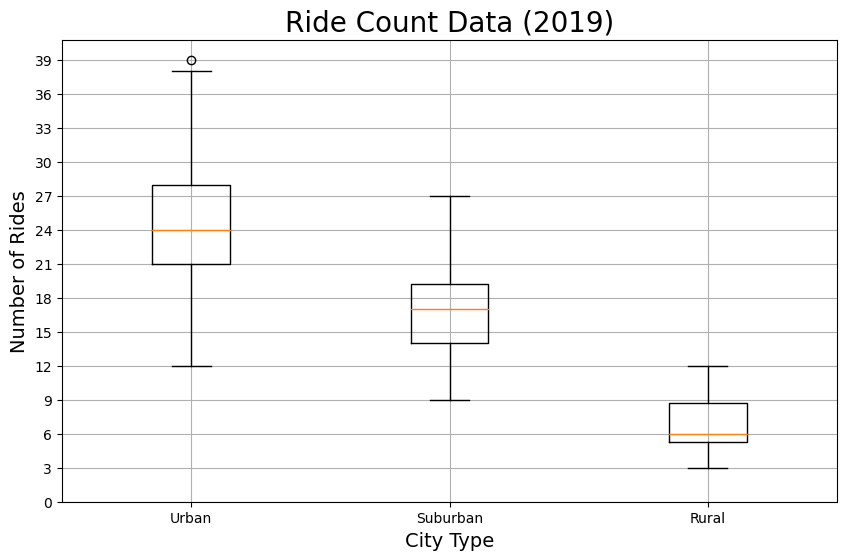

In [46]:
# Create a box-and-whisker plot for the ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Type', fontsize=14)
ax.set_yticks(np.arange(0, 41, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [47]:
# Find the outlier for urban ride counts
urban_city_outliers = urban_ride_count.loc[urban_ride_count==39].index[0]
print(f"{urban_city_outliers} has the highest rider count and may be an outlier.")

West Angela has the highest rider count and may be an outlier.


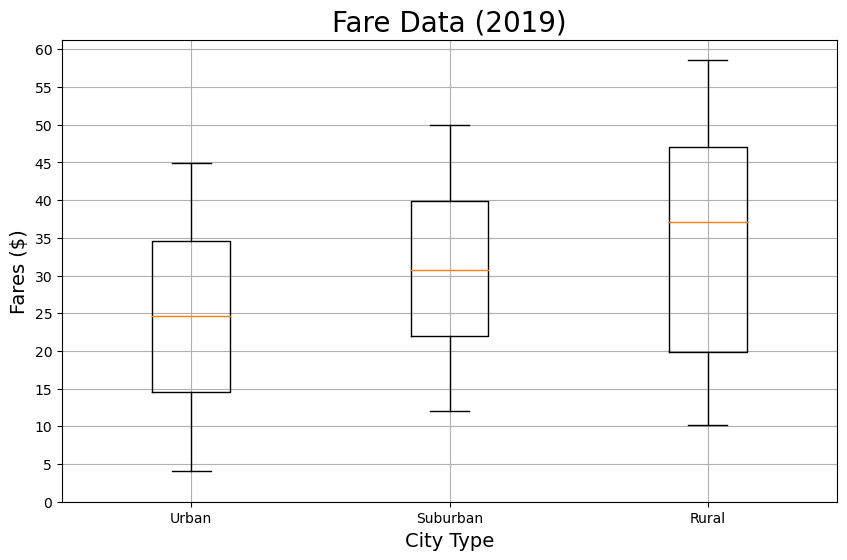

In [48]:
# Create a box-and-whisker plot for the fare.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fares ($)', fontsize=14)
ax.set_xlabel('City Type', fontsize=14)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

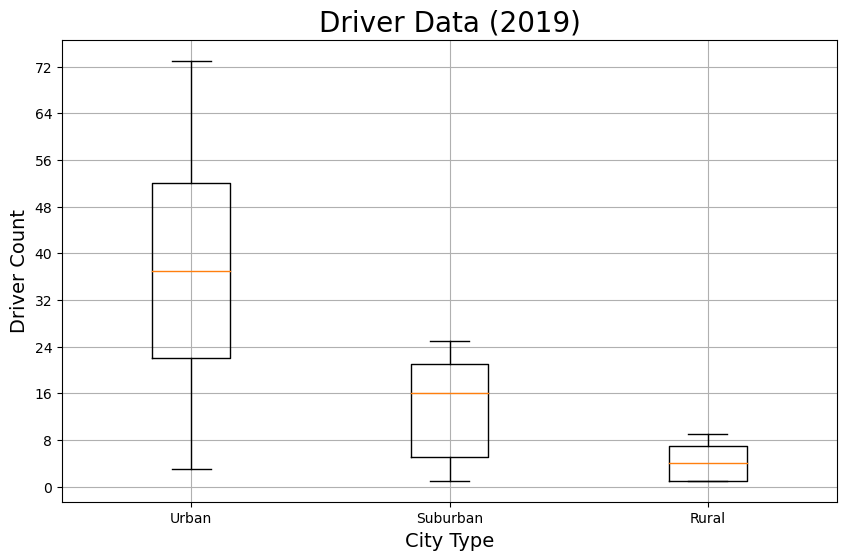

In [49]:
# Create a box-and-whisker plot for the driver count.
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Data (2019)', fontsize=20)
ax.set_ylabel('Driver Count', fontsize=14)
ax.set_xlabel('City Type', fontsize=14)
ax.set_yticks(np.arange(0, 80, step=8.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [52]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type'])['fare'].sum()
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [53]:
# Get the total sum of fares
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [56]:
type_percent = 100*sum_fares_by_type/total_fares 
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

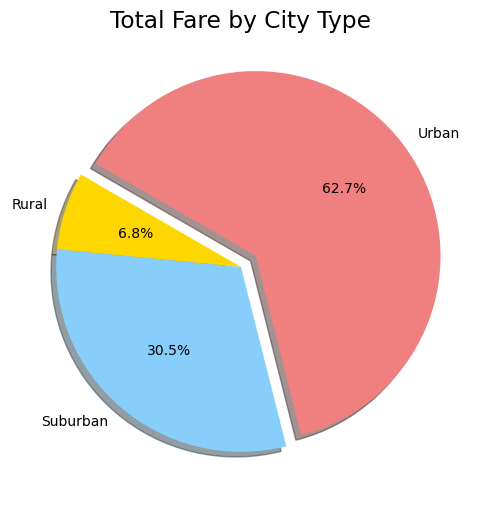

In [67]:
# Import matplotlib
import matplotlib as mpl

# Create pie chart
plt.subplots(figsize=(10,6))
labels = ['Rural', 'Suburban', 'Urban']
plt.pie(type_percent, 
        labels = labels, 
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct='%1.1f%%',
       explode=[0,0,0.1],
       shadow = True,
       startangle=150)
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

plt.title('Total Fare by City Type')
# Save figure
plt.savefig('Analysis/Fig5.png')
plt.show()